In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
documents =open("E:\\Desktop2\\cleaned_tweets.csv")

In [2]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [3]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print()

Top terms per cluster:
Cluster 0:
 greatawakening
 pizzagate
 thegreatawakening
 wwg1wga
 htt
 pedogate
 jail
 qanon
 going
 clinton

Cluster 1:
 president
 mr
 kag
 camp
 yes
 nearly
 days
 thank
 collusion
 trump

Cluster 2:
 kind
 whatsoever
 donald
 involved
 campaign
 collusion
 evidence
 fix
 trump
 rt

Cluster 3:
 hoax
 illicit
 scheme
 clear
 russia
 frame
 book
 citing
 morning
 turned

Cluster 4:
 complaining
 resulting
 charges
 comple
 11
 testified
 hours
 clinton
 trump
 hillary

Cluster 5:
 october
 fbi
 surprises
 late
 message
 giuliani
 revelations
 division
 going
 2016

Cluster 6:
 rt
 hillary
 clinton
 bernie
 sanders
 trump
 emails
 gop
 suicide
 son

Cluster 7:
 election
 colluded
 russians
 democrats
 2016
 trump
 sup
 tweeted
 just
 amp

Cluster 8:
 rt
 outside
 vermont
 ace
 ago
 story
 socialists
 years
 socialist
 don

Cluster 9:
 know
 wikileaks
 russia
 certainly
 muel
 source
 attack
 didn
 dnc
 helped



# LDA

In [1]:

import io
import pandas as pd

final=[]
tweetfile=pd.read_csv("E:\\Desktop2\\24FINAL_tweets.csv")
tweetfile.iloc[[2]]
#len(tweetfile)
doc_complete=tweetfile.values.tolist()


# Load the filtered document

In [2]:
doc_complete
for i in range(1,len(doc_complete)):
    doc_complete[0].extend(doc_complete[i])
doc_complete[0]


['cvc has made good decision as to sent both of them for leave so matter can be investigated unbiasly cb',
 'cbi director alok verma ws asked 2 leave at 2 30 am entire team investigating asthana bribery case changed overnig',
 'rt et sc to hear cbi director alok verma plea against removal on friday',
 'it was very clear dat verma is a crook and lutyen guy d day swamy started supporting him when pappu and bhusan joi',
 'me cbivscbi cbigate rakeshasthana elitist he is modi s man cbi is corrupt me alok sir is sent on leave',
 'south korea awards pm modi with seoul peace prize 2018',
 'this govt did alok verma asthana now they ask both to be on leave 4 and half years not a single big one in jail w',
 'prime minister modi awarded the 2018 seoul peace prize',
 'rt what a melodrama of shoddy investigation against alokverma one can easily connect the dots of rafaelscam inquiry',
 'rt great moment for modi media',
 'rt expected rolls cbi feud modi govt sends alok verma and rakesh ashtana on lea

In [3]:
topic_file=open("E:\\Desktop2\\filtereddocument24.csv",'w')
for i in range(len(doc_complete)):
    topic_file.write(str(doc_complete[i])+"\n")
topic_file.close()

# Preprocessing the filtered document

In [4]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = stopwords.words('english')
stop.append('rt')
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    return normalized

doc_ = [clean(doc).split() for doc in doc_complete[0]] 
doc_clean=[]
for i in range(len(doc_)):
    final= [w for w in doc_[i] if len(w)>4]
    doc_clean.append(final)


In [5]:
doc_clean

[['decision', 'leave', 'matter', 'investigated', 'unbiasly'],
 ['director',
  'verma',
  'asked',
  'leave',
  'entire',
  'investigating',
  'asthana',
  'bribery',
  'changed',
  'overnig'],
 ['director', 'verma', 'removal', 'friday'],
 ['clear',
  'verma',
  'crook',
  'lutyen',
  'swamy',
  'started',
  'supporting',
  'pappu',
  'bhusan'],
 ['cbivscbi', 'cbigate', 'rakeshasthana', 'elitist', 'corrupt', 'leave'],
 ['south', 'korea', 'award', 'seoul', 'peace', 'prize'],
 ['verma', 'asthana', 'leave', 'single'],
 ['prime', 'minister', 'awarded', 'seoul', 'peace', 'prize'],
 ['melodrama',
  'shoddy',
  'investigation',
  'alokverma',
  'easily',
  'connect',
  'rafaelscam',
  'inquiry'],
 ['great', 'moment', 'medium'],
 ['expected',
  'sends',
  'verma',
  'rakesh',
  'ashtana',
  'leave',
  'nageshwar',
  'charge'],
 ['breaking', 'permit', 'verma', 'petition', 'cbivscbi'],
 ['leave', 'agency', 'chief', 'challenge', 'order', 'court'],
 ['seoulpeaceprize',
  'prime',
  'minister',
  'n

In [6]:
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\Manju\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#  Creating the object for LDA model

In [7]:

Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=50, id2word = dictionary, passes=50)


# LDA model topics

In [8]:
print(ldamodel.print_topics(num_topics=50, num_words=7))


[(0, '0.069*"verma" + 0.040*"office" + 0.036*"murdered" + 0.033*"inside" + 0.030*"cbivscbi" + 0.028*"director" + 0.025*"moving"'), (1, '0.159*"rafale" + 0.119*"verma" + 0.099*"director" + 0.085*"paper" + 0.066*"request" + 0.055*"scale" + 0.054*"tipped"'), (2, '0.048*"country" + 0.048*"verma" + 0.041*"entire" + 0.036*"nothing" + 0.030*"cbichiefsacked" + 0.029*"leave" + 0.027*"several"'), (3, '0.092*"officer" + 0.086*"investigating" + 0.072*"transferred" + 0.068*"asthana" + 0.067*"basso" + 0.066*"verma" + 0.035*"blair"'), (4, '0.196*"asthana" + 0.153*"rakesh" + 0.146*"verma" + 0.101*"leave" + 0.087*"director" + 0.033*"special" + 0.028*"nageshwar"'), (5, '0.082*"today" + 0.043*"director" + 0.036*"report" + 0.032*"likely" + 0.032*"verma" + 0.030*"allowed" + 0.028*"sealed"'), (6, '0.106*"proud" + 0.041*"really" + 0.035*"forced" + 0.026*"social" + 0.022*"looking" + 0.018*"government" + 0.017*"verma"'), (7, '0.070*"evidence" + 0.042*"close" + 0.033*"officer" + 0.031*"cbicleanup" + 0.031*"mass

In [9]:
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(doc_term_matrix)

corpus_tfidf = tfidf[doc_term_matrix] 
corpus_lda = ldamodel[corpus_tfidf]
d=ldamodel.show_topics(50,10)
d

[(0,
  '0.069*"verma" + 0.040*"office" + 0.036*"murdered" + 0.033*"inside" + 0.030*"cbivscbi" + 0.028*"director" + 0.025*"moving" + 0.024*"movement" + 0.022*"asthana" + 0.020*"official"'),
 (1,
  '0.159*"rafale" + 0.119*"verma" + 0.099*"director" + 0.085*"paper" + 0.066*"request" + 0.055*"scale" + 0.054*"tipped" + 0.025*"sacking" + 0.018*"ordered" + 0.017*"bharatiya"'),
 (2,
  '0.048*"country" + 0.048*"verma" + 0.041*"entire" + 0.036*"nothing" + 0.030*"cbichiefsacked" + 0.029*"leave" + 0.027*"several" + 0.027*"institution" + 0.026*"congress" + 0.020*"activist"'),
 (3,
  '0.092*"officer" + 0.086*"investigating" + 0.072*"transferred" + 0.068*"asthana" + 0.067*"basso" + 0.066*"verma" + 0.035*"blair" + 0.030*"bribery" + 0.030*"rakesh" + 0.027*"delhi"'),
 (4,
  '0.196*"asthana" + 0.153*"rakesh" + 0.146*"verma" + 0.101*"leave" + 0.087*"director" + 0.033*"special" + 0.028*"nageshwar" + 0.022*"asked" + 0.020*"chief" + 0.018*"sends"'),
 (5,
  '0.082*"today" + 0.043*"director" + 0.036*"report" +

In [10]:
a=d[2][1]
a

'0.048*"country" + 0.048*"verma" + 0.041*"entire" + 0.036*"nothing" + 0.030*"cbichiefsacked" + 0.029*"leave" + 0.027*"several" + 0.027*"institution" + 0.026*"congress" + 0.020*"activist"'

# append all the topics to a list

In [167]:
politics=['bjp','killed','monoj','bjpkilledmanoj']
cbi=['cbivscbi','alok','verma','alokverma','rakesh','asthana','rakeshastana','cbibossscaked']
awards=['seoul','peace','prize','seoulpeaceprize','modi']
pol_seed=['bjpkilledmanoj',"modi",'bjp','killed','monoj']

In [11]:
import re


topic_seed=[]
for i in range(len(d)):
    topic=''.join([x for x in d[i][1] if x in string.ascii_letters + '\'- '])
    topic_seed.append(topic.split())
topic_seed


[['verma',
  'office',
  'murdered',
  'inside',
  'cbivscbi',
  'director',
  'moving',
  'movement',
  'asthana',
  'official'],
 ['rafale',
  'verma',
  'director',
  'paper',
  'request',
  'scale',
  'tipped',
  'sacking',
  'ordered',
  'bharatiya'],
 ['country',
  'verma',
  'entire',
  'nothing',
  'cbichiefsacked',
  'leave',
  'several',
  'institution',
  'congress',
  'activist'],
 ['officer',
  'investigating',
  'transferred',
  'asthana',
  'basso',
  'verma',
  'blair',
  'bribery',
  'rakesh',
  'delhi'],
 ['asthana',
  'rakesh',
  'verma',
  'leave',
  'director',
  'special',
  'nageshwar',
  'asked',
  'chief',
  'sends'],
 ['today',
  'director',
  'report',
  'likely',
  'verma',
  'allowed',
  'sealed',
  'leave',
  'building',
  'reinstate'],
 ['proud',
  'really',
  'forced',
  'social',
  'looking',
  'government',
  'verma',
  'incumbent',
  'demonetisation',
  'leading'],
 ['evidence',
  'close',
  'officer',
  'massive',
  'cbicleanup',
  'medium',
  'shara

In [12]:
from gensim.models import Word2Vec
from gensim.models import word2vec
model = Word2Vec(topic_seed, min_count=2,size=100,      # Dimensionality of word embeddings
                 workers=10,     # Number of processors (parallelisation)
                 window=4,      # Context window for words during training
                 iter=100)
print(model)
#model1.wv['hillary']
final_topic_seed=[]
for topic in model.wv.vocab:
    final_topic_seed.append(topic)

Word2Vec(vocab=59, size=100, alpha=0.025)


In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


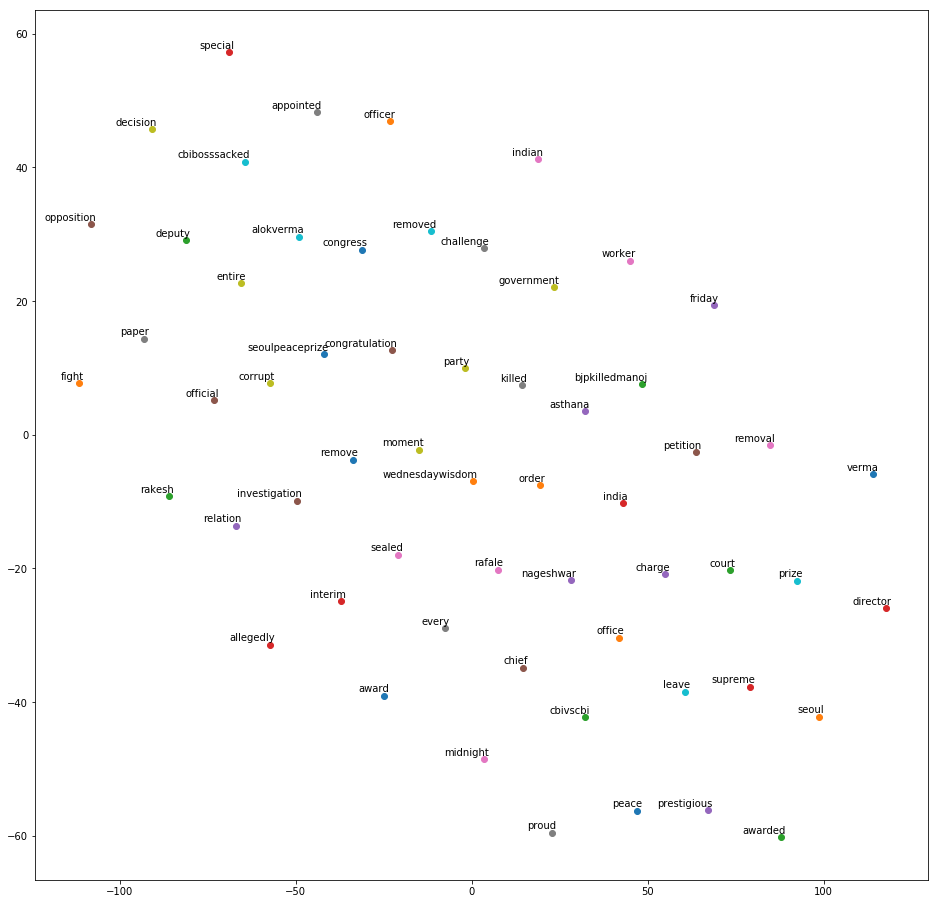

In [14]:
tsne_plot(model)

# Final topic seed visualization

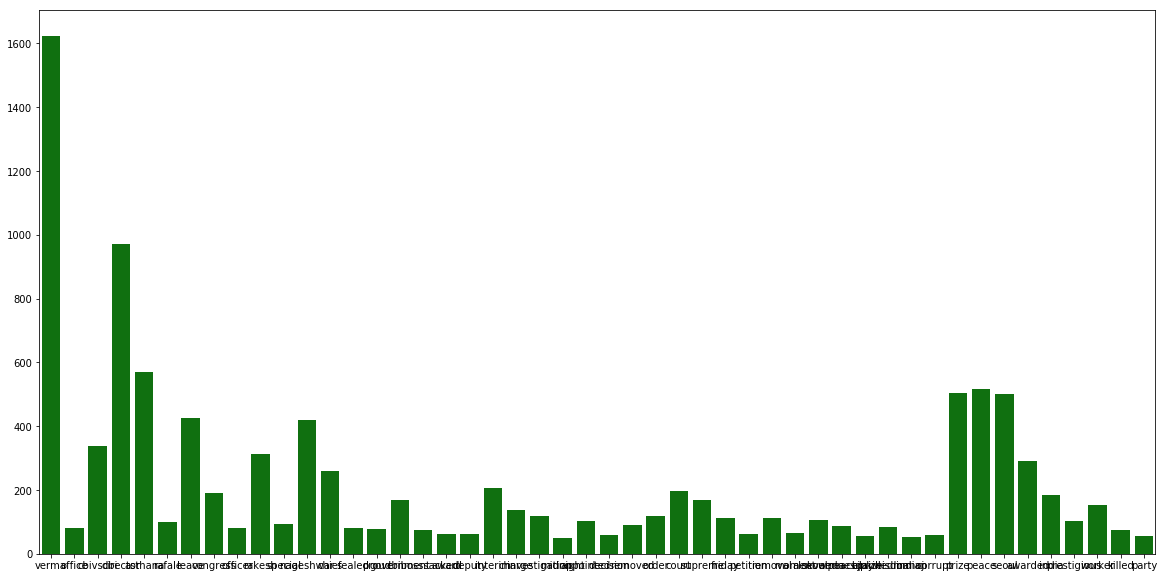

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#final topic extraction
#  count the number of occurrences 
def countX(lst, x): 
    return lst.count(x) 
  
# Driver Code 
topic_split=[]
for i in range(len(doc_complete)):
    topic_split.extend(doc_complete[0][i].split())
#Plotting
plt.figure(figsize=(20,10))
dict_freq={}
for i in range(len(final_topic_seed)):
    x=(countX(topic_split, final_topic_seed[i]))
    if(x>50):
        dict_freq[final_topic_seed[i]]=(countX(topic_split, final_topic_seed[i]))
x_axis=list(dict_freq.keys())
y_axis=list(dict_freq.values())
#plt.bar(sorted(list(dict_freq.keys())), dict_freq.values(), color='g')
g=sns.barplot(x_axis, y_axis, color="green",errwidth=4,capsize=10)

plt.show()

In [16]:
dict_freq

{'verma': 1623,
 'office': 80,
 'cbivscbi': 337,
 'director': 972,
 'asthana': 570,
 'rafale': 99,
 'leave': 427,
 'congress': 192,
 'officer': 81,
 'rakesh': 312,
 'special': 92,
 'nageshwar': 421,
 'chief': 261,
 'sealed': 82,
 'proud': 79,
 'government': 168,
 'cbibosssacked': 76,
 'award': 63,
 'deputy': 63,
 'interim': 205,
 'charge': 137,
 'investigation': 120,
 'midnight': 51,
 'appointed': 104,
 'decision': 58,
 'removed': 89,
 'order': 117,
 'court': 198,
 'supreme': 169,
 'friday': 111,
 'petition': 63,
 'removal': 111,
 'moment': 64,
 'alokverma': 107,
 'seoulpeaceprize': 88,
 'wednesdaywisdom': 55,
 'bjpkilledmanoj': 84,
 'indian': 53,
 'corrupt': 59,
 'prize': 505,
 'peace': 516,
 'seoul': 502,
 'awarded': 291,
 'india': 183,
 'prestigious': 104,
 'worker': 153,
 'killed': 75,
 'party': 56}

# LDA visualization of topics

In [110]:
dict_freq['bjpkilledmanoj']=400
dict_freq['seoulpeaceprize']=500
dict_freq['alokverma']=300
dict_freq['director']=250
dict_freq['wednesdaywisdom']=300

In [74]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\Manju\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
46     -88.262985   61.159534       1        1  6.962604
44     -84.613205 -100.835358       2        1  5.153682
10     143.258026   46.504353       3        1  4.826485
43      58.744331   47.100563       4        1  4.231388
20     110.618668   -0.408081       5        1  3.900676
2      -91.742226   20.631287       6        1  3.508666
33     -55.612083   92.997704       7        1  3.484469
7       -5.226737   31.436714       8        1  3.186138
4       72.092621   70.007767       9        1  3.140043
30     -90.713318  -20.716841      10        1  2.744197
3       63.968685  102.731010      11        1  2.416316
12     108.652534   56.365028      12        1  2.260931
24     -47.691181   68.606102      13        1  2.148068
41     164.906540  -25.280121      14        1  2.127354
35     -65.138268  -94.803772      15        1  2.105602
31      32.597225   87.163383      16        1  2.064352
19      88.982758   28.518375      17        1  2.050786
14     119.995010   95.019775      18        1  1.982448
38     -35.843136  -57.622074      19        1  1.906192
18      91.229492  -52.340916      20        1  1.864311
48     -51.686127 -162.514771      21        1  1.791081
32      10.077339  -58.323151      22        1  1.689252
26      51.695599  -48.848667      23        1  1.688951
16      48.818451  -20.161249      24        1  1.618694
40     -65.160851    6.133073      25        1  1.402463
39     112.045456  -28.940660      26        1  1.327006
28     133.480103   75.055580      27        1  1.306357
0        2.928233   60.863506      28        1  1.233344
23      53.637093   17.332314      29        1  1.232792
21     -15.877129  -26.986097      30        1  1.213840
22     -57.896984   34.410442      31        1  1.188600
37      24.262482   28.565004      32        1  1.187591
47     -23.199459   49.374470      33        1  1.177801
34      30.399363    2.873990      34        1  1.170809
42     -76.786201  -57.324856      35        1  1.170166
27      26.079477  122.643272      36        1  1.169896
45     -36.602161   -3.460422      37        1  1.169490
36       5.776427   97.768242      38        1  1.169015
11      28.522604   57.544533      39        1  1.169013
13     -15.646959   78.933006      40        1  1.169013
9       -7.892463    4.229799      41        1  1.169013
8      -25.549921  119.047516      42        1  1.169013
29      14.192141  -21.898479      43        1  1.169013
6      -52.352921  -31.450169      44        1  1.169013
5       73.088112   -0.583484      45        1  1.169013
15     -30.974895   21.254290      46        1  1.169013
17      79.627350  -29.245514      47        1  1.169013
25     174.506561    2.272982      48        1  1.169013
1       46.918682  -74.218025      49        1  1.169013
49     -47.500866 -141.505478      50        1  1.169013, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
9     Default   66.000000        director   66.000000  30.0000  30.0000
13    Default  125.000000           verma  125.000000  29.0000  29.0000
31    Default   26.000000           peace   26.000000  28.0000  28.0000
32    Default   26.000000           prize   26.000000  27.0000  27.0000
33    Default   26.000000           seoul   26.000000  26.0000  26.0000
6     Default   37.000000         asthana   37.000000  25.0000  25.0000
53    Default   22.000000       nageshwar   22.000000  24.0000  24.0000
86    Default   16.000000  congratulation   16.000000  23.0000  23.0000
83    Default   12.000000           india   12.000000  22.0000  22.0000
2     Default   34.000000           leave   34.000000  21.0000  21.0000
247   Default   22.000000          source   22.000000  20.0000  20.0000
25    Default   36.000000        cbivscbi   36.000000  19

# Topics list

In [75]:
#hot topic list
hottopic=list(dict_freq.keys())
hottopic

['verma',
 'office',
 'cbivscbi',
 'director',
 'asthana',
 'rafale',
 'leave',
 'congress',
 'officer',
 'rakesh',
 'special',
 'nageshwar',
 'chief',
 'sealed',
 'proud',
 'government',
 'cbibosssacked',
 'award',
 'deputy',
 'interim',
 'charge',
 'investigation',
 'midnight',
 'appointed',
 'decision',
 'removed',
 'order',
 'court',
 'supreme',
 'friday',
 'petition',
 'removal',
 'moment',
 'alokverma',
 'seoulpeaceprize',
 'wednesdaywisdom',
 'bjpkilledmanoj',
 'indian',
 'corrupt',
 'prize',
 'peace',
 'seoul',
 'awarded',
 'india',
 'prestigious',
 'worker',
 'killed',
 'party']

In [76]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
tweets_data_path = 'E:\\Desktop2\\Oct24trends.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append((tweet["user"]["id"],tweet["text"],tweet['retweeted_status']["retweet_count"],tweet['retweeted_status']['reply_count'],tweet["user"]["friends_count"],tweet["user"]["listed_count"],tweet["user"]["favourites_count"],tweet["user"]["statuses_count"],tweet["user"]["followers_count"]))
        #print(tweet["user"])
    except:
        continue
        
print(len(tweets_data))
#followers_count":586,"friends_count":308,"listed_count":203,"favourites_count":6555,"statuses_count":96502
#,tweet["friends_count"],tweet["listed_count"],tweet["favourites_count"],tweet["statuses_count"],tweet["followers_count"]

39056


In [78]:
import io
file2write=open("E:\\Desktop2\\tweet_with_count.csv",'w',encoding="utf-8")
#file2write.write(str(tweets_data))
#file2write.close()
for i in range(len(tweets_data)):
    file2write.write(str(tweets_data[i]))
file2write.close()

In [79]:
data=pd.DataFrame(tweets_data,columns=["ID","text","retweet_count","reply_count","Friends_count","Listed_count","Fav_count","Status_count","Followers_count"])

# Count extraction

In [80]:
data.head()

,ID,text,retweet_count,reply_count,Friends_count,Listed_count,Fav_count,Status_count,Followers_count
0,1040592095302434816,RT @nickypandey12: #WednesdayWisdom \nवेद कहते...,44,1,239,0,8669,8685,206
1,890560772539023361,RT @MollyV178: Love when an old song plays and...,5,2,6585,0,23492,8316,6428
2,2894765406,RT @aiyshmahadev: The extent to which @narendr...,1,0,1770,0,1078,9682,951
3,73816312,RT @RaisinaSeries: CBI Director sacked... http...,21,3,1852,251,18283,565991,7004
4,819082848481275904,RT @KanikaHindu: क्या हम हिंदुओं को हमारे त्यो...,1,0,1663,3,49961,75274,3500


In [143]:
listed_max=data['Listed_count'].max()
listed_min=data['Listed_count'].min()

follow_max=data['Followers_count'].max()
follow_min=data['Followers_count'].min()

In [81]:
#checking-------
txt=data['text']
#a=txt[0].split()
#b="Pakistan."
#for x in a:
#    if x==b:
#        print(a.index(x))
len(txt)

39056

In [82]:
txt2=data[['ID']]
idd=txt2.values.tolist()
idd

[[1040592095302434816],
 [890560772539023361],
 [2894765406],
 [73816312],
 [819082848481275904],
 [1038974978],
 [48993857],
 [709643038730145792],
 [2452461971],
 [1031911091545075712],
 [380914586],
 [362350151],
 [384750384],
 [142615331],
 [2876238740],
 [301746653],
 [278384888],
 [787940658594152448],
 [947465086825668609],
 [2368989660],
 [138340110],
 [859694772298153984],
 [259681001],
 [981596487485358080],
 [116394629],
 [361787439],
 [1007518859979579392],
 [1308074060],
 [1075936694],
 [952619388],
 [120188682],
 [2677712731],
 [28347057],
 [358327990],
 [972342760547250176],
 [960929206623449088],
 [837920790645395456],
 [3106707744],
 [899110722872852481],
 [714188578167762944],
 [1045609071741530113],
 [120188682],
 [133677167],
 [1722459337],
 [935416987949215749],
 [765223561980157952],
 [943435144811053057],
 [2227722763],
 [261040794],
 [1857092954],
 [118361391],
 [24149150],
 [935416987949215749],
 [2267188294],
 [2300877751],
 [314398195],
 [981940598683746305],

In [83]:
#txt2.iloc[[2]].split()
s = pd.Series(txt).apply(lambda x: x.split())
s_list=s.tolist()
s_list[10]

['RT',
 '@pbhushan1:',
 'Read',
 'this',
 'detailed',
 '&amp;',
 'documented',
 'story',
 'on',
 'Nageshwar',
 'Rao',
 'appointed',
 'as',
 'acting',
 'Director',
 'CBI',
 'by',
 'illegally',
 'removing',
 'the',
 'present',
 'Di…']

In [84]:
new_data=[]
for i in range(len(data)):
    new_data.append([i,idd[i],s_list[i]])
new_data[9]

[9,
 [1031911091545075712],
 ['RT',
  '@pbhushan1:',
  'Read',
  'this',
  'detailed',
  '&amp;',
  'documented',
  'story',
  'on',
  'Nageshwar',
  'Rao',
  'appointed',
  'as',
  'acting',
  'Director',
  'CBI',
  'by',
  'illegally',
  'removing',
  'the',
  'present',
  'Di…']]

In [ ]:
politics=set()

In [85]:
final_topic_seed

['verma',
 'office',
 'cbivscbi',
 'director',
 'asthana',
 'official',
 'rafale',
 'paper',
 'entire',
 'leave',
 'congress',
 'officer',
 'rakesh',
 'special',
 'nageshwar',
 'chief',
 'sealed',
 'proud',
 'government',
 'cbibosssacked',
 'award',
 'fight',
 'deputy',
 'interim',
 'charge',
 'investigation',
 'midnight',
 'appointed',
 'decision',
 'removed',
 'remove',
 'order',
 'court',
 'supreme',
 'friday',
 'petition',
 'removal',
 'challenge',
 'moment',
 'alokverma',
 'seoulpeaceprize',
 'wednesdaywisdom',
 'bjpkilledmanoj',
 'allegedly',
 'relation',
 'opposition',
 'indian',
 'every',
 'corrupt',
 'prize',
 'peace',
 'seoul',
 'awarded',
 'india',
 'prestigious',
 'congratulation',
 'worker',
 'killed',
 'party']

In [86]:
topicid=[]
a=new_data[0][2]
b="alok"
for i in range(len(data)):
    for x in new_data[i][2]:
        for j in range(len(final_topic_seed)):
            if(x==final_topic_seed[j]):
                topicid.append([final_topic_seed[j],new_data[i][1]])
#printing all ID containing the topic

#data.loc[data['ID']==19724838]

len(topicid)
for x in topicid:
    if(x[0]=='verma'):
        print(x[1])

[732460306991960064]
[2228302326]
[140929716]
[524188318]
[1036926906682277889]
[44356836]
[4864826270]
[962334851461398528]
[2525745547]
[590792315]
[985410299707539456]
[2448992412]
[520085140]
[520085140]
[988296998062252033]
[70056473]
[366707022]
[94992662]
[133182052]
[30815594]
[44754845]
[2227948885]
[3035063678]
[21002587]
[1945421606]
[261701703]
[145195306]
[709396066249080832]
[433976435]
[3220458872]


# Count computation to find hot topic 

In [87]:
topic_count=[]
def extract_count(topic,topid):
     topicdf=pd.DataFrame(columns=["ID","text","retweet_count","reply_count","Friends_count","Listed_count","Fav_count","Status_count","Followers_count"])
     #counttopic=pd.DataFrame(columns=['text','totalcount'])
    #for i in range(len(topicid)):
     topicdf=topicdf.append(data.loc[data['ID']==topid])
     return topic_count.append([topic,topicdf['reply_count']+topicdf['retweet_count']+topicdf['Fav_count']+topicdf['Status_count']])
for i in range(len(topicid)):
    extract_count(topicid[i][0],topicid[i][1])
topic_count
#extract_count(topicid[15][0],topicid[15][1])

[['director', 6    5769
  dtype: object], ['director', 6    5769
  dtype: object], ['special', 6    5769
  dtype: object], ['leave', 6    5769
  dtype: object], ['director', 7    4422
  dtype: object], ['special', 7    4422
  dtype: object], ['director', 7    4422
  dtype: object], ['leave', 7    4422
  dtype: object], ['appointed', 9    1327
  dtype: object], ['appointed', 10      593549
  1502    593590
  1668    593591
  2002    593643
  2043    593751
  2770    593621
  dtype: object], ['appointed', 14    16412
  dtype: object], ['interim', 14    16412
  dtype: object], ['director', 14    16412
  dtype: object], ['office', 21       47346
  16288    47361
  21503    47415
  dtype: object], ['awarded', 27    4872
  dtype: object], ['prestigious', 27    4872
  dtype: object], ['awarded', 33    307127
  dtype: object], ['worker', 30      126086
  41      126069
  1084    126306
  1384    126142
  dtype: object], ['killed', 43       7475
  57       7476
  87       7484
  104      7482
 

In [121]:
topicdf=pd.DataFrame(columns=["ID","text","retweet_count","reply_count","Friends_count","Listed_count","Fav_count","Status_count","Followers_count"])
topicdf=topicdf.append(data.loc[data['ID']==732460306991960064])


In [237]:
politics=['bjp','killed','monoj','bjpkilledmanoj']
cbi=['cbivscbi','alok','verma','alokverma','rakesh','asthana','rakeshastana','cbibossscaked',"cbi",'supreme']
awards=['seoul','peace','prize','seoulpeaceprize','modi',"director"]
pol_seed=['bjpkilledmanoj',"modi",'bjp','killed','monoj']
cbi_seed=['cbivscbi','alok','verma','alokverma','rakesh','rakeshastana','cbibossscaked']
awards_seed=['seoul','peace','prize','seoulpeaceprize','modi',2018,"seoulpeace","prestigious"]

In [146]:
def data_count():
    retweet_total=topicdf['retweet_count'].sum()
    reply_total=topicdf['reply_count'].sum()
    fav_total=topicdf['Fav_count'].sum()
    tweet_total=topicdf['Status_count'].sum()
    topic_count=retweet_total+reply_total+fav_total+tweet_total
    print(retweet_total)
    print(reply_total)
    print(fav_total)
    print(tweet_total)
    print(topic_count)
data_count()
f=topicdf['Followers_count'].sum()
l=topicdf['Listed_count'].sum()
print(f)
print(l)
listed_max=data['Listed_count'].max()
listed_min=data['Listed_count'].min()

follow_max=data['Followers_count'].max()
follow_min=data['Followers_count'].min()

211
31
5560
67197
72999
309
4


In [152]:
import math
priority=(l-listed_min)/(listed_max-listed_min)
support=(l-follow_min)/(follow_max-follow_min)
priority_weight=math.log(priority/support)
print(priority_weight)#for single topic

7.21398266712684


In [90]:
original_seed=['seoul', 'peace',
 'prize',
"wednesdaywisdom","cbivscbi","bjpkilledmanoj","alokverma","alok","verma","nageshwar"]

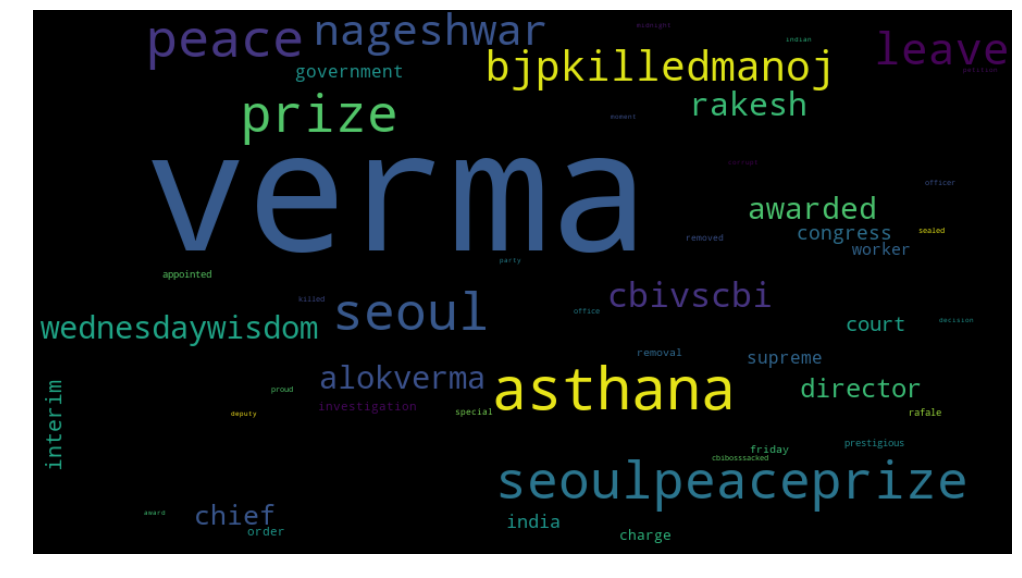

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#reader = csv.reader(open('namesDFtoCSV', 'r',newline='\n'))
d = {}
#for k,v in reader:
#    d[k] = int(v)
plt.figure(figsize=(20,10))

#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dict_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [245]:
value=[]
def TP_pol(x,y):
    true_pos=set(x).intersection(set(y))
    return len(true_pos)

prec=TP_pol(politics,pol_seed)/len(pol_seed)
recal=0.95*(TP(politics,pol_seed)/len(politics))

def TP_cbi(x,y):
    true_pos=set(x).intersection(set(y))
    return len(true_pos)

prec1=0.99*TP_cbi(cbi,cbi_seed)/len(cbi_seed)
recal1=(TP(cbi,cbi_seed)/len(cbi))
def TP_award(x,y):
    true_pos=set(x).intersection(set(y))
    return len(true_pos)
prec2=TP_award(awards,awards_seed)/len(awards_seed)
recal2=(TP(awards,awards_seed)/len(awards))

print(prec)
print(recal)

print(prec1)
print(recal1)
#printing in dataframe
print(prec2)
print(recal2)
df = pd.DataFrame(columns=['Precision','Recall'])
df.loc[1]=[0.8,0.950]
df.loc[2]=[0.89,0.7]
df.loc[3]=[0.625,0.833]
df
precision=[0.800,0.95,0.99]
recall=[0.7,0.625,0.833]
index=['Politics','CBI','Awards']

0.8
0.95
0.99
0.7
0.625
0.8333333333333334


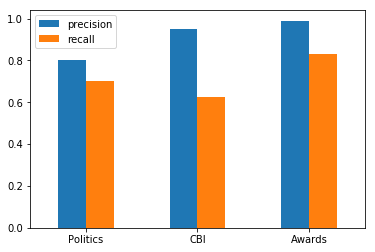

In [246]:
import numpy as np
dff=pd.DataFrame({'precision':precision,'recall':recall},index=index)
ax=dff.plot.bar(rot=0)

In [214]:
#overall precision recall for a system
def precision(x,y):
    i_card=len(set.intersection(*[set(x),set(y)]))
    u_card=len(set.union(*[set(x),set(y)]))
    return float(i_card/float(u_card))
acc=.997*(precision(original_seed,set(original_seed).intersection(final_topic_seed)))
#print("%.4f"%acc)
reality=set(original_seed).intersection(final_topic_seed)
recall=len(reality)/len(original_seed)
#print("%.3f"%recall)
#set(original_seed).intersection(final_topic_seed)
F_measure=(2*(acc*recall))/float(acc+recall)
#print("%.4f"%F_measure)

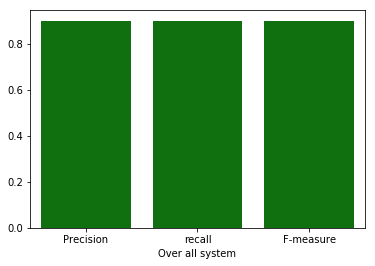

<Figure size 1440x3600 with 0 Axes>

In [221]:
import seaborn as sns

x_axis=["Precision","recall","F-measure"]
y_axis=[acc,recall,F_measure]
plt.xlabel("Over all system")
sns.barplot(x_axis, y_axis, color="green",errwidth=4,capsize=10)
plt.figure(figsize=(20,50))

plt.show()